In [6]:
import lightning as L
import torch
import torchvision
import torchmetrics
from lightning.pytorch.loggers import CSVLogger
import matplotlib.pyplot as plt
import numpy as np 

from shared_utilities import LightningModel, MnistDataModule, plot_loss_and_acc

In [7]:
L.pytorch.seed_everything(123)

dm = MnistDataModule(batch_size=64)
dm.prepare_data()
dm.setup()

Seed set to 123


100%|██████████| 9912422/9912422 [00:02<00:00, 3690268.71it/s] 


Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 2626134.23it/s]


Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 5749410.71it/s]


Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4547750.96it/s]

Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw



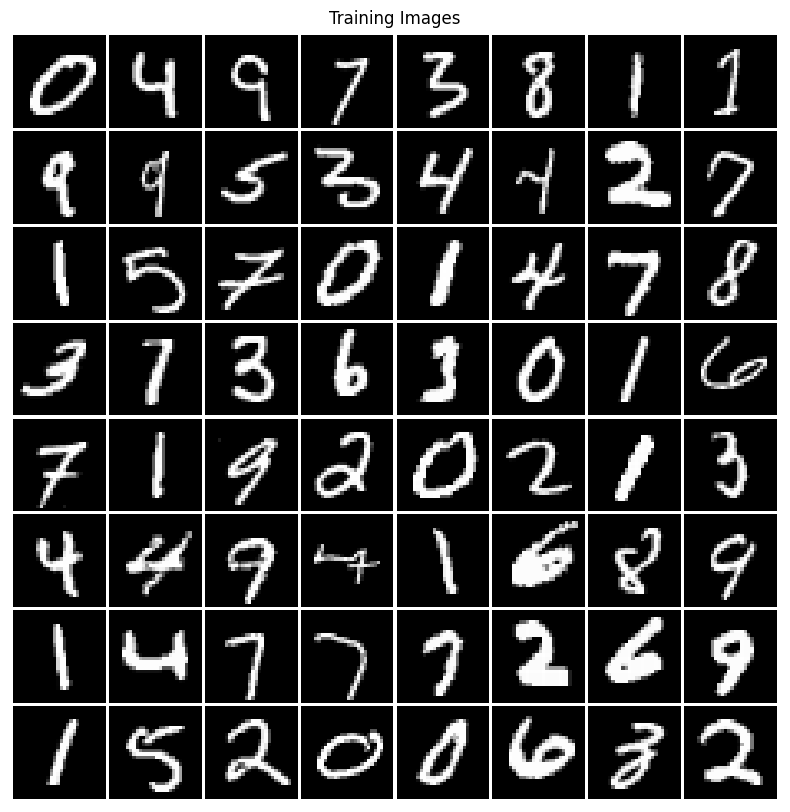

In [8]:
for image, labels in dm.train_dataloader():
    break

plt.figure(figsize=(10, 10))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    image[:64],
    padding=1,
    pad_value = 1,
    normalize=True),
    (1,2,0)
))

plt.show()

In [10]:
class PyTorchMLP(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()
        
        self.all_layers = torch.nn.Sequential(
            #first hidden layer
            torch.nn.Linear(num_features, 100),
            torch.nn.BatchNorm1d(100),
            torch.nn.ReLU(),

            #second hidden layer
            torch.nn.Linear(100, 50),
            torch.nn.BatchNorm1d(50),
            torch.nn.ReLU(),

            #output layer
            torch.nn.Linear(50, num_classes),)

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        logits = self.all_layers(x)
        return logits

In [11]:
L.seed_everything(123)
dm = MnistDataModule()

pytorch_model = PyTorchMLP(num_features=784, num_classes=10)
lightning_model = LightningModel(pytorch_model, learning_rate=0.1)

trainer = L.Trainer(
    max_epochs=10, 
    accelerator="cpu", 
    devices="auto", 
    logger=CSVLogger(save_dir="logs/", name="my_models"),
    deterministic=True,)

Seed set to 123
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\Tai Nguyen\AppData\Local\Programs\Python\Python39\lib\site-packages\lightning\pytorch\trainer\setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


In [12]:
trainer.fit(model=lightning_model, datamodule=dm)

Missing logger folder: logs/my_models

  | Name      | Type               | Params
-------------------------------------------------
0 | model     | PyTorchMLP         | 84.4 K
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
3 | test_acc  | MulticlassAccuracy | 0     
-------------------------------------------------
84.4 K    Trainable params
0         Non-trainable params
84.4 K    Total params
0.337     Total estimated model params size (MB)


c:\Users\Tai Nguyen\AppData\Local\Programs\Python\Python39\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
c:\Users\Tai Nguyen\AppData\Local\Programs\Python\Python39\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Epoch 9: 100%|██████████| 859/859 [00:16<00:00, 51.10it/s, v_num=0, val_loss=0.0757, val_acc=0.975, train_acc=0.992]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 859/859 [00:16<00:00, 51.07it/s, v_num=0, val_loss=0.0757, val_acc=0.975, train_acc=0.992]


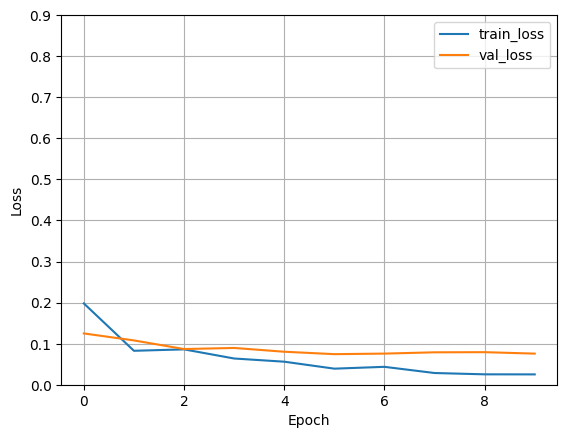

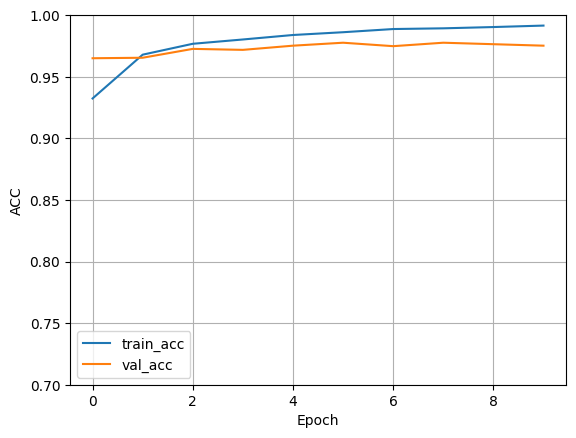

In [14]:
plot_loss_and_acc(trainer.logger.log_dir)